# Sheet 2

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Normalized Cut
- ### Given the graph below. The weight on each edge is the affinity between two nodes. Consider the two cuts. $C1$ and $C2$ in the graph. For each cut, compute the values of the graph cut and the normalized cut.

### $C1$ Cut
$$ \text{CUT}(A, B) = (10 + 10 + 20) * 2 = \boxed{80} $$
I multiplied by $2$ because an undirected edge can be regarded as $2$ edges going back and forth to any pair of vertices.
$$ \text{vol}(A) = \sum_{u \in A, v \in V} w(u, v) = (30 + 20) + (30 + 10) = 90 $$
$$ \text{vol}(B) = \sum_{u \in B, v \in V} w(u, v) = (20 + 20 + 20) + (20 + 10 + 10 + 10) + (10 + 10 + 20) + (20 + 30) + (30 + 10 + 25) + (25 + 20) = 310 $$
$$ N_{\text{CUT}}(A, B) = \text{CUT}(A, B) \left[ \frac{1}{\text{vol}(A)} + \frac{1}{\text{vol}(B)} \right] = 80 \cdot \left[ \frac{1}{90} + \frac{1}{310} \right] = \boxed{1.147} $$

### $C2$ Cut
$$ \text{CUT}(A, B) = (10 + 10 + 20 + 10) * 2 = \boxed{100} $$
I multiplied by $2$ because an undirected edge can be regarded as $2$ edges going back and forth to any pair of vertices.
$$ \text{vol}(A) = \sum_{u \in A, v \in V} w(u, v) = (10 + 10) + (10 + 10 + 30) + (30 + 20) + (10 + 10 + 10 + 20) + (20 + 20 + 20) = 230$$
$$ \text{vol}(B) = \sum_{u \in B, v \in V} w(u, v) = (10 + 10 + 20) + (20 + 30) + (30 + 10 + 25) + (25 + 20) = 200 $$
$$ N_{\text{CUT}}(A, B) = \text{CUT}(A, B) \left[ \frac{1}{\text{vol}(A)} + \frac{1}{\text{vol}(B)} \right] = 100 \cdot \left[ \frac{1}{230} + \frac{1}{200} \right] = \boxed{0.935} $$

- ### Which cut will be favored by each algorithm? What is your explanation?

For the graph cut algorithm, $C1$ will be favored as it gives less value for the cut. Graph cut tends to isolate small group of vertices as dictated by its objective function.
On the other hand, normalized cut algorithm will choose $C2$ cut because it has less $N_{\text{CUT}}$ value. Normalized cut tends to balance the clusters in terms of number of edges and the similarity between them.

# K-ways normalized
### Write your python code to implement K-ways normalized

In [8]:
points = np.array([
    [5, 8],
    [10, 8],
    [11, 8],
    [6, 7],
    [10, 7],
    [12, 7],
    [13, 7],
    [5, 6],
    [10, 6],
    [13, 6],
    [14, 6],
    [6, 5],
    [11, 5],
    [15, 5],
    [2, 4],
    [3, 4],
    [5, 4],
    [6, 4],
    [7, 4],
    [9, 4],
    [15, 4],
    [3, 3],
    [7, 3],
    [8, 2]
])

In [21]:
from sklearn.cluster import KMeans
def rbf_dist(d, gamma):
    pairwise_euclid = np.linalg.norm(d[:, None, ...] - d, axis=2) ** 2
    rbf = np.exp(-gamma * pairwise_euclid)
    return rbf

def knn_dist(d, k):
    dist_mat = np.linalg.norm(d[:, None, ...] - d, axis=2)
    nearset_mat = np.zeros_like(dist_mat)
    inds = np.argpartition(dist_mat, k+1, axis=1)[:, :k+1]
    nearset_mat[np.arange(len(dist_mat)).reshape(-1, 1), inds] = 1
    np.fill_diagonal(nearset_mat, 0)
    return nearset_mat

def get_laplacian(adj_mat):
    return np.diag(adj_mat.sum(axis=1)) - adj_mat

def get_k_eigvecs(laplacian, k):
    diag = np.diag(np.diag(laplacian)) + 1e-9
    
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(diag) @ laplacian)
    eig_vals = np.real(eig_vals)
    eig_vecs = np.real(eig_vecs)
    inds = np.argsort(eig_vals)[:k]
    eig_vecs = eig_vecs[:, inds]
    norms = np.linalg.norm(eig_vecs, axis=1, keepdims=True) + 1e-9
    eig_vecs = eig_vecs / norms
    return eig_vecs

def spectral_clustering(dataset, k, gamma=0.1, method='rbf', knn_points=3, ret_eig_vecs=False):
    if method == 'rbf':
        sim_mat = rbf_dist(dataset, gamma)
    elif method == 'knn':
        sim_mat = knn_dist(dataset, knn_points)
    else:
        raise Exception("Method does not exist")
    laplacian = get_laplacian(sim_mat)
    eig_vecs = get_k_eigvecs(laplacian, k)
    kmeans = KMeans(k)
    assignments = kmeans.fit_predict(eig_vecs)
    if ret_eig_vecs:
        return assignments, eig_vecs
    else:
        return assignments


## RBF similarity for different gammas

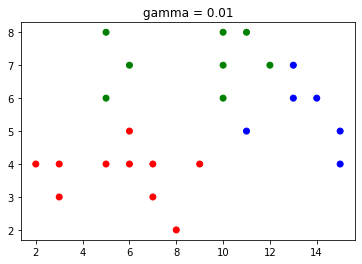

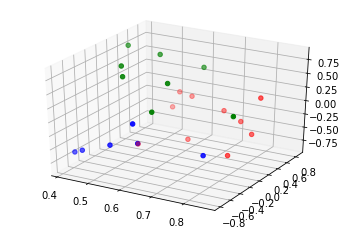

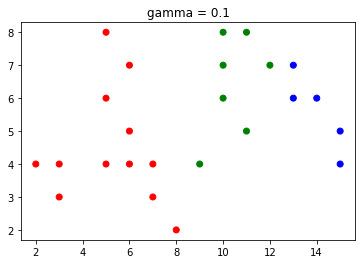

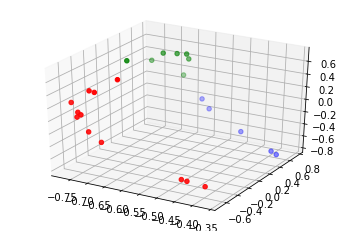

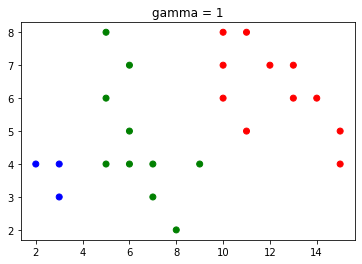

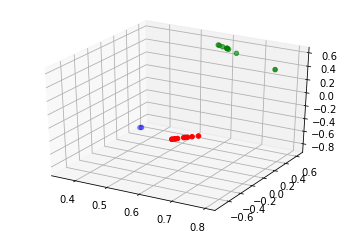

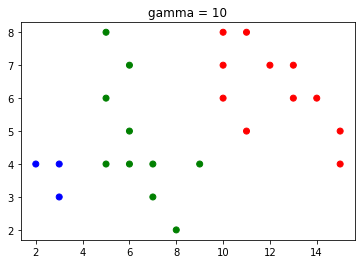

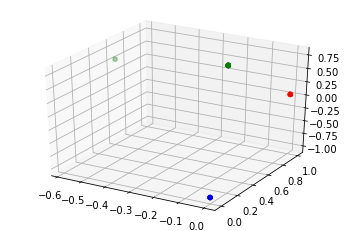

In [22]:
%matplotlib inline
colors = ['r', 'g', 'b', 'm']
for gamma in [0.01, 0.1, 1, 10]:
    assignment, eig_vecs = spectral_clustering(points, 3, gamma, 'rbf', ret_eig_vecs=True)
    plt.scatter(points[:, 0], points[:, 1], c=[colors[a] for a in assignment])
    plt.title(f'gamma = {gamma}')
    plt.show()
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(eig_vecs[:, 0], eig_vecs[:, 1], eig_vecs[:, 2], c=[colors[a] for a in assignment])
    plt.show()

## 3-NN similarity

[[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.

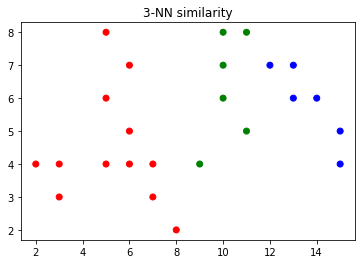

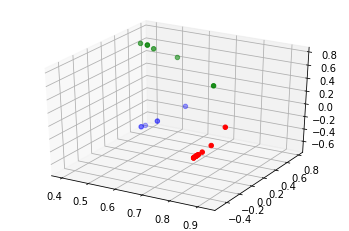

In [23]:
assignment, eig_vecs = spectral_clustering(points, 3, method='knn', knn_points=3, ret_eig_vecs=True)
plt.scatter(points[:, 0], points[:, 1], c=[colors[a] for a in assignment])
plt.title(f'3-NN similarity')
plt.show()
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(eig_vecs[:, 0], eig_vecs[:, 1], eig_vecs[:, 2], c=[colors[a] for a in assignment])
plt.show()

In [12]:
def conditinal_entropy(pred, gt):
    clusters, cluster_sizes = np.unique(pred, return_counts=True)
    
    clusters_entropy = []
    for cluster in clusters:
        cluster_points = gt[pred == cluster]
        classes_counts = np.unique(cluster_points, return_counts=True)[1] / len(cluster_points)
        clusters_entropy.append((-classes_counts * np.log(classes_counts)).sum())
    clusters_entropy = np.array(clusters_entropy)
    return (cluster_sizes / len(gt) * clusters_entropy).sum()

In [13]:
def get_contingency_table(pred, gt):
    clusters = np.arange(pred.max() + 1)
    r = pred.max() + 1
    k = gt.max() + 1
    mat = np.zeros((r, k))
    for cluster in clusters:
        points = gt[pred == cluster]
        vals, counts = np.unique(points, return_counts=True)
        mat[cluster, vals] += counts
    return mat
    

In [14]:
def get_purity(pred, gt):
    mat = get_contingency_table(pred, gt)
    return mat.max(axis=1).sum() / mat.sum()

In [15]:
def get_f_measure(pred, gt):
    mat = get_contingency_table(pred, gt)
    prec = mat.max(axis=1) / mat.sum(axis=1)
    recall = mat.max(axis=1) / np.array([np.unique(gt[pred == label], return_counts=True)[1].max() for label in range(pred.max()+1)])
    f = 2 * prec * recall / (prec + recall)
    return f.sum() / len(mat)

In [16]:
def get_jaccard_index(pred, gt):
    n = len(pred)
    TP = FP = TN = FN = 0
    for i in range(n):
        for j in range(n):
            TP += gt[i] == gt[j] and pred[i] == pred[j]
            FP += not gt[i] == gt[j] and pred[i] == pred[j]
            TN += not gt[i] == gt[j] and not pred[i] == pred[j]
            FN += gt[i] == gt[j] and not pred[i] == pred[j]
    return TP / (TP + FN + FP)

def get_rand_index(pred, gt):
    n = len(pred)
    pairs_cnt = n * (n-1) / 2
    TP = FP = TN = FN = 0
    for i in range(n):
        for j in range(n):
            TP += gt[i] == gt[j] and pred[i] == pred[j]
            FP += not gt[i] == gt[j] and pred[i] == pred[j]
            TN += not gt[i] == gt[j] and not pred[i] == pred[j]
            FN += gt[i] == gt[j] and not pred[i] == pred[j]
    return (TP + TN)/ 2 / pairs_cnt


In [17]:
def betaCV(pred, dist_mat):
    W_in = W_out = 0
    n = len(pred)
    for cluster in np.unique(pred):
        in_cluster = np.where(pred == cluster)[0]
        out_cluster = np.where(pred != cluster)[0]

        for i in in_cluster:
            for j in in_cluster:
                W_in += dist_mat[i][j]

        for i in in_cluster:
            for j in out_cluster:
                W_out += dist_mat[i][j]
    W_in /= 2
    W_out /= 2
    counts = np.unique(pred, return_counts=True)[1]
    N_in = (counts * (counts -1)).sum() / 2
    N_out = n * (n-1) / 2 - N_in
    return N_out * W_in / (N_in * W_out)

def normalized_cut_measure(pred, dist_mat):
    nc_measure = 0
    for cluster in np.unique(pred):
        in_cluster = np.where(pred == cluster)[0]
        W = 0
        for i in in_cluster:
            for j in in_cluster:
                W += dist_mat[i][j]
        
        nc_measure += W / dist_mat[in_cluster].sum()
    return nc_measure


In [18]:
def evaluate_cluster(pred, gt, sim_mat):
    print(f'purity = {get_purity(pred, gt)}')
    print(f'conditional entropy = {conditinal_entropy(pred, gt)}')
    print(f'jaccard index = {get_jaccard_index(pred, gt)}')
    print(f'rand index = {get_rand_index(pred, gt)}')
    print(f'f-measure = {get_f_measure(pred, gt)}')
    print(f'betaCV = {betaCV(pred, 1 - sim_mat)}')
    print(f'Normalized Cut Measure = {normalized_cut_measure(pred, 1 - sim_mat)}')

# Clustering Evaluation

### Using K-means: set K=2,3,4. Report different clustering results

purity = 0.7916666666666666
conditional entropy = 0.5676866939921372
jaccard index = 0.5853658536585366
rand index = 0.7971014492753623
f-measure = 0.8852813852813852
betaCV = 0.8328920893783756
Normalized Cut Measure = 0.8651348651348651


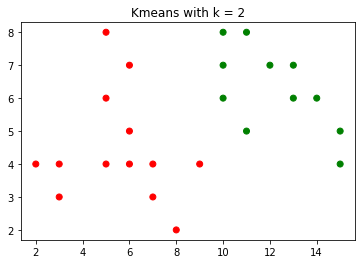

purity = 0.75
conditional entropy = 0.6358473726551163
jaccard index = 0.4
rand index = 0.6956521739130435
f-measure = 0.8706552706552707
betaCV = 0.8043880518107323
Normalized Cut Measure = 0.7645124716553289


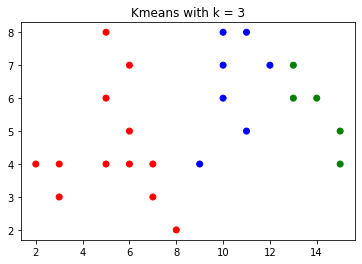

purity = 0.7916666666666666
conditional entropy = 0.4290220891935723
jaccard index = 0.37681159420289856
rand index = 0.7318840579710145
f-measure = 0.8888888888888888
betaCV = 0.7349896480331263
Normalized Cut Measure = 0.6702380952380953


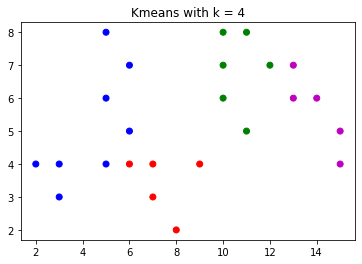

In [19]:
sim_mat = knn_dist(points, 3)
gt = np.array([1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 0, 1, 1, 1, 2, 0, 1, 1])

for k in [2, 3, 4]:
    kmeans = KMeans(k)
    pred = kmeans.fit_predict(points)
    evaluate_cluster(pred, gt, sim_mat)
    plt.scatter(points[:, 0], points[:, 1], c=[colors[a] for a in pred])
    plt.title(f'Kmeans with k = {k}')
    plt.show()

### K-ways normalized: cut k=2,3,4. Use Similarity graph as the 3-NN graph. Where $\text{sim}(x_i, x_j) = 1$ iff $x_j$ is one of the nearest three points to $x_i$ (or vise-versa). Report different clustering results.

purity = 0.7916666666666666
conditional entropy = 0.5676866939921372
jaccard index = 0.5853658536585366
rand index = 0.7971014492753623
f-measure = 0.8852813852813852
betaCV = 0.8328920893783756
Normalized Cut Measure = 0.8651348651348651


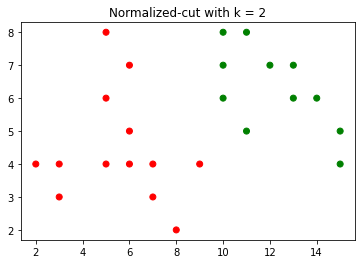

purity = 0.75
conditional entropy = 0.6372602126836935
jaccard index = 0.39375
rand index = 0.6920289855072463
f-measure = 0.8727272727272727
betaCV = 0.7869718309859155
Normalized Cut Measure = 0.75


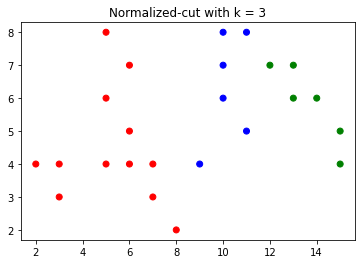

purity = 0.8333333333333334
conditional entropy = 0.4356569114111409
jaccard index = 0.45185185185185184
rand index = 0.7753623188405797
f-measure = 0.8898395721925134
betaCV = 0.7241379310344828
Normalized Cut Measure = 0.656084656084656


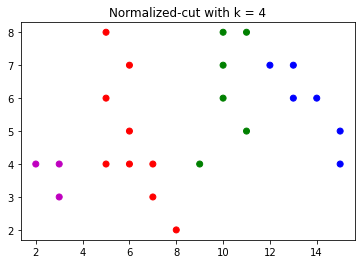

In [20]:
for k in [2, 3, 4]:
    pred = spectral_clustering(points, k, method='knn', knn_points=3)
    evaluate_cluster(pred, gt, sim_mat)
    plt.scatter(points[:, 0], points[:, 1], c=[colors[a] for a in pred])
    plt.title(f'Normalized-cut with k = {k}')
    plt.show()